# EDA 

Learning about data and patterns

# 1- Importing key modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import numpy as np 
import pandas as pd 

#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# 2-Loading data 

In [4]:
filename1="newsCorpora.csv"
filename2="2pageSessions.csv"

In [8]:
df=pd.read_csv(filename1,sep='\t', header=None)
df.head(2)

,0,1,2,3,4,5,6,7
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207


In [9]:
header_list = ["id", "title", "url","publisher","category","story","hostname","timestamp"]
df=pd.read_csv(filename1,sep='\t', names=header_list)
df.shape

(422419, 8)

In [10]:
df.head(2)

,id,title,url,publisher,category,story,hostname,timestamp
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207


### 2.1. checking missing values

In [49]:
df.isnull().sum()

id           0
title        0
url          0
publisher    2
category     0
story        0
hostname     0
timestamp    0
time         0
year         0
months       0
day          0
dtype: int64

In [50]:
df[df.publisher.isnull()]

,id,title,url,publisher,category,story,hostname,timestamp,time,year,months,day
4556,4557,Federal Prosecutors Want Cash From Denver Pot ...,http://denver.cbslocal.com/2014/03/10/federal-...,NaN,b,d__jcKruuebDhTMfkhbUJpI3MBjEM,denver.cbslocal.com,1394565833004,2014-03-11 19:23:53.004,2014,3,11
14203,14204,Honda Recalls Nearly 900000 Minivans,http://dfw.cbslocal.com/2014/03/16/honda-recal...,NaN,t,dRxWun-PlDEkGpMTSH5m3mrA0rO2M,dfw.cbslocal.com,1395062073951,2014-03-17 13:14:33.951,2014,3,17


We can replace these two values with "other"

In [52]:
df=df.fillna("other") 

In [53]:
df.isnull().sum()

id           0
title        0
url          0
publisher    0
category     0
story        0
hostname     0
timestamp    0
time         0
year         0
months       0
day          0
dtype: int64

### 2.2.checking duplicate values 

In [54]:
df.duplicated().sum()

0

There are no duplicate values.So, no need to inspect that

### 2.3.Exploring target feature

In [14]:
df.category.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: category, dtype: int64

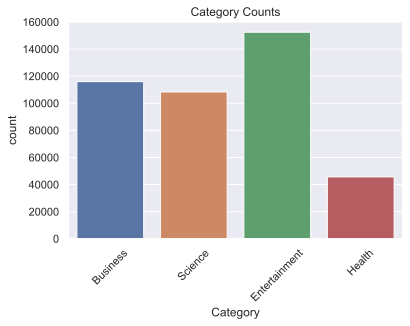

In [15]:
cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}
ax = sns.countplot(df['category'])
ax.set_title("Category Counts")
ax.set_xlabel("Category")
ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
plt.show()

**some information about pubmisher**

In [13]:
from collections import Counter

# Byte magic to style print output. 
#Reference https://stackoverflow.com/questions/62131164/how-to-return-bold-characters-in-python-terminal
def emphasize(s):
    """Bold the string to help get the print reader's attention.
    
    Parameters
    ----------
    s : str
        String to be decorated with bold.
    
    Returns
    -------
    str
        The string in bold.
    """
    green= '\033[92m'
    stop = '\x1b[0m'
    return green + str(s) + stop

nunique = df['publisher'].nunique()
print("There are {} different publishers. Below some of the most common:".format(emphasize(nunique)))
for key, value in Counter(df['publisher']).most_common(5):
    print("   {} posted {} articles".format(emphasize(key), emphasize(value)))

There are 10985 different publishers. Below some of the most common:
   Reuters posted 3902 articles
   Huffington Post posted 2455 articles
   Businessweek posted 2395 articles
   Contactmusic.com posted 2334 articles
   Daily Mail posted 2254 articles


### 2.4.exploring reference dataset

In [17]:
header_list2 = ["story","hostname","category","url"]
df_page=pd.read_csv(filename2,sep='\t', names=header_list2)
df_page.head(2)

,story,hostname,category,url
0,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,techcrunch.com,b,http://techcrunch.com/ http://techcrunch.com/2...
1,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,techcrunch.com,b,http://techcrunch.com/ecommerce/ http://techcr...


In [18]:
df_page.shape

(15516, 4)

In [19]:
df_page.url[0]

'http://techcrunch.com/ http://techcrunch.com/2014/03/10/ebay-asks-shareholders-to-vote-against-paypal-split-while-icahn-claims-ceo-incompetence-cost-4b/ '

In [20]:
df_page.category.value_counts()

e    9425
b    6091
Name: category, dtype: int64

We can scrap few values from url and then merge them with original dataset using "story" variable. But, this is not focus of this assignment

# 3.Work with timestamp feature

In [21]:
df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
df.head(2)

,id,title,url,publisher,category,story,hostname,timestamp,time
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207


In [22]:
def start_end(dates):
    return "{}/{}/{}".format(dates.day, dates.month, dates.year)

In [23]:
start= df['time'].min()
end=df['time'].max() 

In [24]:
print("Our dataset timeline starts at {} and ends at {}".format(start_end(start), start_end(end)))

Our dataset timeline starts at 10/3/2014 and ends at 28/8/2014


- We can find that dataset starts from 10th of March so all previous days are not part of it
- Also Data ends at 28th August so it does not give information of full month of August 

In [25]:
df['year'] = df['time'].apply(lambda date: date.year)
df['months'] = df['time'].apply(lambda date: date.month)
df['day'] = df['time'].apply(lambda date: date.day)

In [26]:
df.head(2)

,id,title,url,publisher,category,story,hostname,timestamp,time,year,months,day
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,2014,3,10
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,2014,3,10


In [27]:
df.months.nunique()

6

In [28]:
df.months.unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [29]:
df.day.nunique()

31

### 3.1.Distribution of articles over months

In [43]:
p=df
p.groupby(p.months).size()

months
3     73316
4    102404
5     90800
6     70999
7     67843
8     17057
dtype: int64

In [44]:
dist=p.months.value_counts(ascending=True).sort_index()

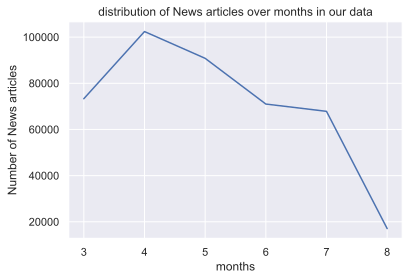

In [45]:
dist.plot()
plt.xlabel('months')
plt.ylabel('Number of News articles')
plt.title('distribution of News articles over months in our data')
plt.show()

We find "102404" articles in April which is highest and "17057" in August which is the lowest

### 3.2. Distribution of articles w.r.t categories

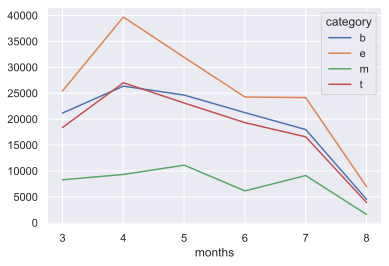

In [47]:
d=df
d=d.groupby(["months","category"]).size()
d=d.unstack('category')
d.plot()

### 3.3. Normalized Distribution of articles over months

- We use 21 days of March, 27 days of August therefore, we would not get a tru understanding if we consider overall month distribution. For this reason, let's do normalization through days.
- Also we better bar plot as we have categories. They could be better understood.

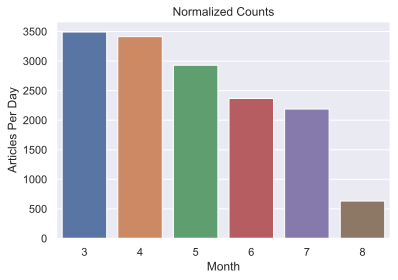

In [30]:
month_days = {
    3: 21, 
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 27
}
articles_per_day = {}
for month in month_days:
    n_articles = len(df[df['months'] == month])
    articles_per_day[month] = n_articles / month_days[month]

ax = sns.barplot(x=list(articles_per_day.keys()), y=list(articles_per_day.values()))
ax.set_title("Normalized Counts")
ax.set_xlabel("Month")
ax.set_ylabel("Articles Per Day")
plt.show()

There are very few news articles in August,we have got data for 28 days


### 3.4.Distribution of categories over months

In [36]:
data_month=df['months'].sort_values()

In [39]:
new_df=df[['category','months']]

In [40]:
df_ct = (new_df.reset_index()
          .groupby(['months','category'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'count'})
       )

In [41]:
df_ct

,months,category,count
0,3,b,21182
1,3,e,25441
2,3,m,8300
3,3,t,18393
4,4,b,26367
5,4,e,39691
6,4,m,9327
7,4,t,27019
8,5,b,24637
9,5,e,31932


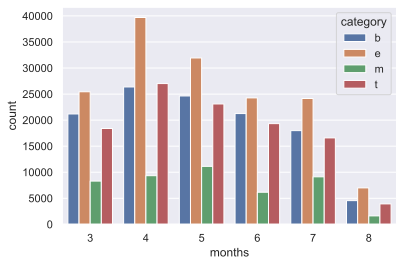

In [42]:
sns.barplot(x="months", y="count",hue="category", data=df_ct);

- Distribution of categories is pretty consistent. entertainment remains the lead in all of the months where health related articles were lower in original data and this pattern remains the same in all months.
- Business and technology have a less difference in overall data and also in our monthly disribution. This could have been interesting. For example in month of April , technology has more articles than business. However; this difference is slim and would not create any differences in understanding customers' interest towards news.
- Hence,There is no unusual pattern in our data 

### 3.5. Publishers' distribution

In [55]:
df.category.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: category, dtype: int64

In [74]:
nunique = df['publisher'].nunique()
print("There are {} different publishers. Below some of the most common:".format(emphasize(nunique)))
for key, value in Counter(df['publisher']).most_common(5):
    print("   {} posted {} articles".format(emphasize(key), emphasize(value)))

There are 10986 different publishers. Below some of the most common:
   Reuters posted 3902 articles
   Huffington Post posted 2455 articles
   Businessweek posted 2395 articles
   Contactmusic.com posted 2334 articles
   Daily Mail posted 2254 articles


In [75]:
top5 = df['publisher'].value_counts().index[:5]
df_pub = df[df['publisher'].isin(top5)]

In [76]:
df_pub.publisher.value_counts()

Reuters             3902
Huffington Post     2455
Businessweek        2395
Contactmusic.com    2334
Daily Mail          2254
Name: publisher, dtype: int64

We can see which are top5 publishing companies. Let's explore their monthly activity

In [77]:
df_new=df_pub[["months","publisher"]]

In [78]:
df_ct2 = (df_new.reset_index()
          .groupby(['months','publisher'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'count'})
       )

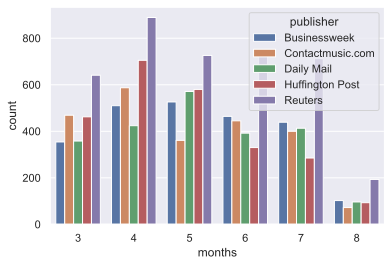

In [79]:
sns.barplot(x="months", y="count",hue="publisher", data=df_ct2);

Through this, we can how actively leading publishers are creating content.

# 4- Ratio of Entertainment and Business

As business and entertainment are the most frequent categories, I calculated their difference and then check which publisher has more interest in which category.

In [184]:
top10 = df['publisher'].value_counts().index[:10]
df_pub = df[df['publisher'].isin(top10)]

In [132]:
value_counts = df_pub['publisher'].value_counts(dropna=True, sort=True)
data = value_counts.rename_axis('Top_publishers').reset_index(name='publisher-counts')
df_val_counts = pd.DataFrame(data)
df_val_counts

,Top_publishers,publisher-counts
0,Reuters,3902
1,Huffington Post,2455
2,Businessweek,2395
3,Contactmusic.com,2334
4,Daily Mail,2254
5,NASDAQ,2228
6,Examiner.com,2085
7,Los Angeles Times,1976
8,GlobalPost,1975
9,RTT News,1798


##### lets talk about ratios

In [133]:
r=df_pub

In [134]:
r=r[r.category=="e"]

In [135]:
r.category.value_counts()

e    8094
Name: category, dtype: int64

In [136]:
value_counts = r['publisher'].value_counts(sort=False)
data = value_counts.rename_axis('top_publishers').reset_index(name='entertainment')
df_entertain_counts = pd.DataFrame(data)
df_entertain_counts

,top_publishers,entertainment
0,Los Angeles Times,1001
1,Contactmusic.com,2309
2,Daily Mail,1474
3,Huffington Post,1225
4,GlobalPost,176
5,Businessweek,87
6,RTT News,222
7,Examiner.com,1393
8,NASDAQ,23
9,Reuters,184


In [137]:
b=df_pub
b=b[b.category=="b"]

In [138]:
b.category.value_counts()

b    10849
Name: category, dtype: int64

In [139]:
value_counts = b['publisher'].value_counts(sort=False)
data = value_counts.rename_axis('top_publishers').reset_index(name='business')
df_business_counts = pd.DataFrame(data)
df_business_counts

,top_publishers,business
0,Huffington Post,442
1,Reuters,3157
2,Los Angeles Times,468
3,Contactmusic.com,2
4,Daily Mail,204
5,GlobalPost,1380
6,Businessweek,1822
7,RTT News,1326
8,Examiner.com,126
9,NASDAQ,1922


In [140]:
df_publish=df_business_counts
df_publish=df_publish.set_index("top_publishers")

In [141]:
df_merge=df_publish.merge(df_entertain_counts, on='top_publishers')
df_merge

,top_publishers,business,entertainment
0,Huffington Post,442,1225
1,Reuters,3157,184
2,Los Angeles Times,468,1001
3,Contactmusic.com,2,2309
4,Daily Mail,204,1474
5,GlobalPost,1380,176
6,Businessweek,1822,87
7,RTT News,1326,222
8,Examiner.com,126,1393
9,NASDAQ,1922,23


In [142]:
df_merge['ER']=(df_merge['entertainment'])/(df_merge['business']+df_merge['entertainment'])
df_merge['BR']=(df_merge['business'])/(df_merge['business']+df_merge['entertainment'])

In [146]:
df_merge=df_merge.set_index("top_publishers")

#### ploting Entertainment category Ratio

In [147]:
plot_ER=df_merge.ER.sort_values()

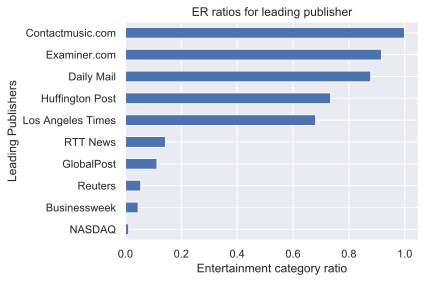

In [149]:
plot_ER.plot(kind='barh')
plt.xlabel("Entertainment category ratio")
plt.ylabel("Leading Publishers")
plt.title("ER ratios for leading publisher")
plt.tight_layout()
plt.show()

#### ploting Business category Ratio

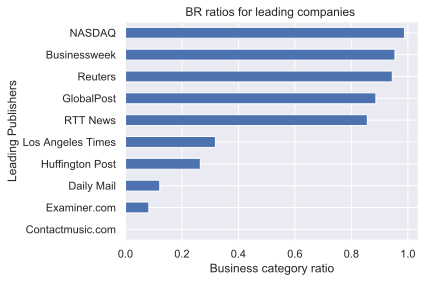

In [151]:
plot_BR=df_merge.BR.sort_values()
plot_BR.plot(kind='barh')
plt.xlabel("Business category ratio")
plt.ylabel("Leading Publishers")
plt.title("BR ratios for leading companies ")
plt.tight_layout()
plt.show()

This is useful as we could see that each publisher has its own core competence in publishing content. We can see "NASDAQ" being high in Business category while being low in entertainment category.

#### Monthly trend of ER and BR

In [197]:
df_pub.category.value_counts()

b    10849
e     8094
t     2745
m     1714
Name: category, dtype: int64

In [198]:
counts=df_pub['category'].value_counts()
data = df_pub.loc[df['category'].isin(counts.index[counts > 8090])]

In [199]:
data.category.value_counts()

b    10849
e     8094
Name: category, dtype: int64

In [200]:
df_mon=data[["months","category"]]

In [201]:
df_count = (df_mon.reset_index()
          .groupby(['months','category'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [202]:
df_count

,months,category,ct
0,3,b,1713
1,3,e,1539
2,4,b,2459
3,4,e,2064
4,5,b,2300
5,5,e,1651
6,6,b,2074
7,6,e,1305
8,7,b,1849
9,7,e,1213


In [203]:
a=df_count
a=a[a.category=='e']
a=a.rename(columns={"ct":"entertainment"})
a['business'] = [1713, 2459, 2300,2074,1849,454]
a

,months,category,entertainment,business
1,3,e,1539,1713
3,4,e,2064,2459
5,5,e,1651,2300
7,6,e,1305,2074
9,7,e,1213,1849
11,8,e,322,454


In [204]:
a['ER']=(a['entertainment'])/(a['entertainment'] + a['business'])
a['BR']=(a['business'])/(a['entertainment'] + a['business'])

In [205]:
a

,months,category,entertainment,business,ER,BR
1,3,e,1539,1713,0.473247,0.526753
3,4,e,2064,2459,0.456334,0.543666
5,5,e,1651,2300,0.417869,0.582131
7,6,e,1305,2074,0.386209,0.613791
9,7,e,1213,1849,0.396146,0.603854
11,8,e,322,454,0.414948,0.585052


All these changes have given idea about features and their somewhat relationship. I have not used story, url,hostname. I think if I was asked to scrap data with help of these features then they would make more value. In EDA, they didn't make much value.
- In next section, I shall work more on headline feature and explore what type of text data it contains.

In [206]:
draw=a
draw=draw.set_index("months")
df_strackchart=draw.drop(["category","entertainment","business"], axis=1)

In [207]:
df_strackchart

,ER,BR
months,,
3,0.473247,0.526753
4,0.456334,0.543666
5,0.417869,0.582131
6,0.386209,0.613791
7,0.396146,0.603854
8,0.414948,0.585052


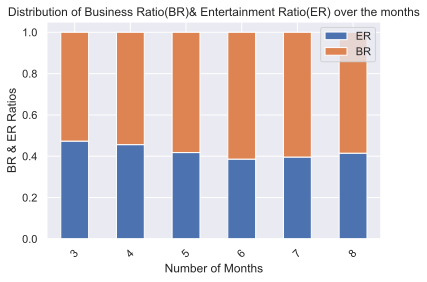

In [209]:
df_strackchart.plot.bar(stacked=True , rot=45 , title= "Distribution of Business Ratio(BR)& Entertainment Ratio(ER) over the months")
plt.xlabel("Number of Months")
plt.ylabel("BR & ER Ratios")
plt.show(block=True);

- I did filtering over top publishers and then checked if there is any difference yet results are same. 

- Once we check top publishers, it is clear that business articles have higher ratio of articles in our dataset than of entertainment. It means entertainment content is dominating in our data however; among top publishers ......business content is more frequent.

- This idea could be understood for data collection part as well. Lets say we want to scrap more data from entertainment and business and add to our current data then if we only focus on top 10 publishers then we might have higher chance of data biaseness. 